# Шаг 1

Датасет: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

# Шаг 2

Исследование корреляций. Постройте корреляционную матрицу для числовых признаков. Визуализируйте корреляционную матрицу с помощью тепловой карты (heatmap). Определите пары признаков с наибольшей и наименьшей корреляцией. Для этого найдите максимальные и минимальные значения в корреляционной матрице, исключив диагональные элементы.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('miami-housing.csv', sep=',')
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


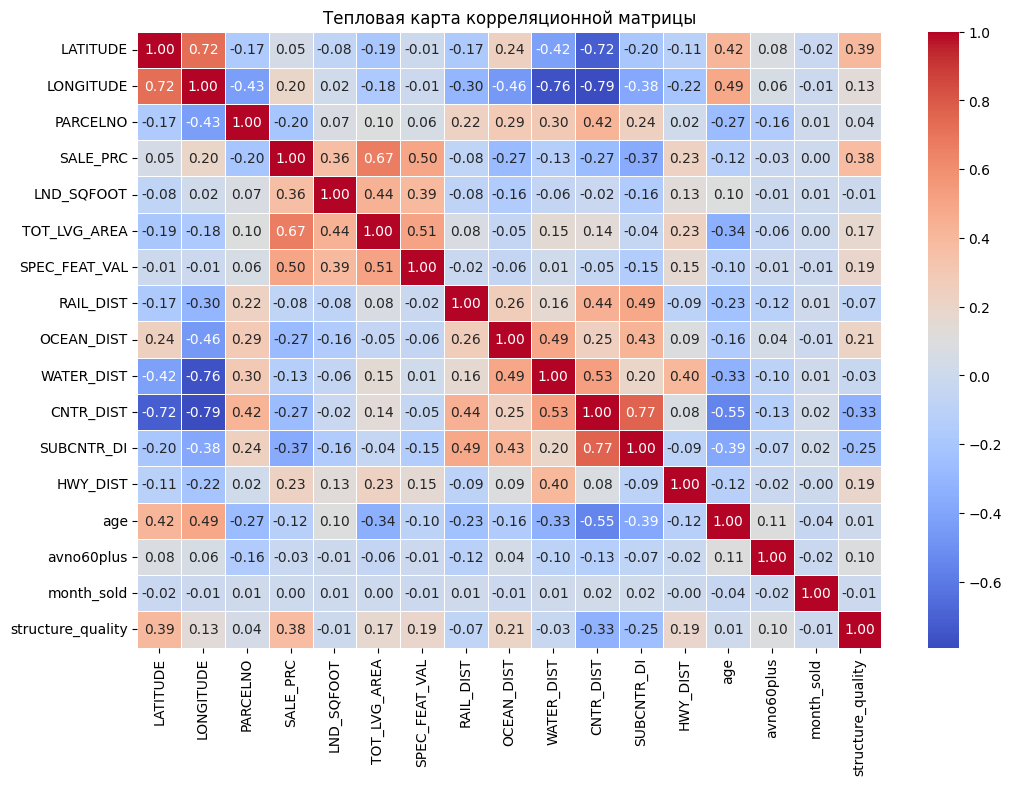

(0.7663868827943943,
 ('CNTR_DIST', 'SUBCNTR_DI'),
 -0.7919677572114714,
 ('LONGITUDE', 'CNTR_DIST'))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем только числовые столбцы
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Вычисляем корреляционную матрицу
correlation_matrix = numerical_data.corr()

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта корреляционной матрицы')
plt.show()

# Копируем корреляционную матрицу, чтобы исключить диагональные элементы
correlation_matrix_no_diag = correlation_matrix.copy()

# Заменяем диагональные элементы на NaN, чтобы исключить их из поиска
np.fill_diagonal(correlation_matrix_no_diag.values, np.nan)

# Находим максимальные и минимальные значения корреляции (без учета диагонали)
max_corr = correlation_matrix_no_diag.max().max()
min_corr = correlation_matrix_no_diag.min().min()

# Находим пары признаков с наибольшей и наименьшей корреляцией
max_corr_pair = correlation_matrix_no_diag.stack().idxmax()
min_corr_pair = correlation_matrix_no_diag.stack().idxmin()

max_corr, max_corr_pair, min_corr, min_corr_pair



# Шаг 3


Построение графиков зависимостей. Выберите два признака с сильной корреляцией. Замените на реальные названия признаков из вашего датасета. Постройте диаграмму рассеяния (scatter plot) и добавьте линию регрессии.

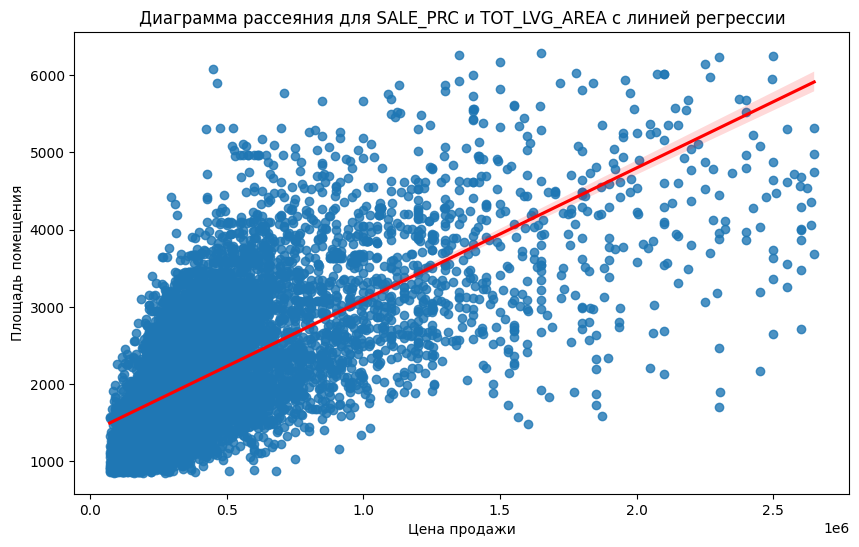

In [ ]:
# Выбираем два признака с сильной корреляцией: CNTR_DIST и SUBCNTR_DI
x_feature = 'SALE_PRC'
y_feature = 'TOT_LVG_AREA'

# Построение диаграммы рассеяния с линией регрессии
plt.figure(figsize=(10, 6))
sns.regplot(x=df[x_feature], y=df[y_feature], line_kws={"color":"red"})
plt.title(f'Диаграмма рассеяния для {x_feature} и {y_feature} с линией регрессии')
plt.xlabel('Цена продажи')
plt.ylabel('Площадь помещения')
plt.show()


# Шаг 4

Подготовка данных. Нормализуйте данные, чтобы привести все признаки к одному масштабу, используя стандартное масштабирование. Разделите данные на обучающую и тестовую выборки в пропорции 80/20

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем числовые признаки для нормализации
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Целевая переменная 'SALE_PRC' и объясняющие признаки (все остальные)
X = df.drop(columns=['SALE_PRC'])
y = df['SALE_PRC']

# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки в пропорции 80/20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Выводим размеры обучающей и тестовой выборок
X_train.shape, X_test.shape


((11145, 16), (2787, 16))

# Шаг 5

Визуализация трендов. Используйте модель линейной регрессии для предсказания и постройте график распределения ошибок между предсказанными и реальными значениями. Постройте график ошибок (выбросов), чтобы оценить точность модели.

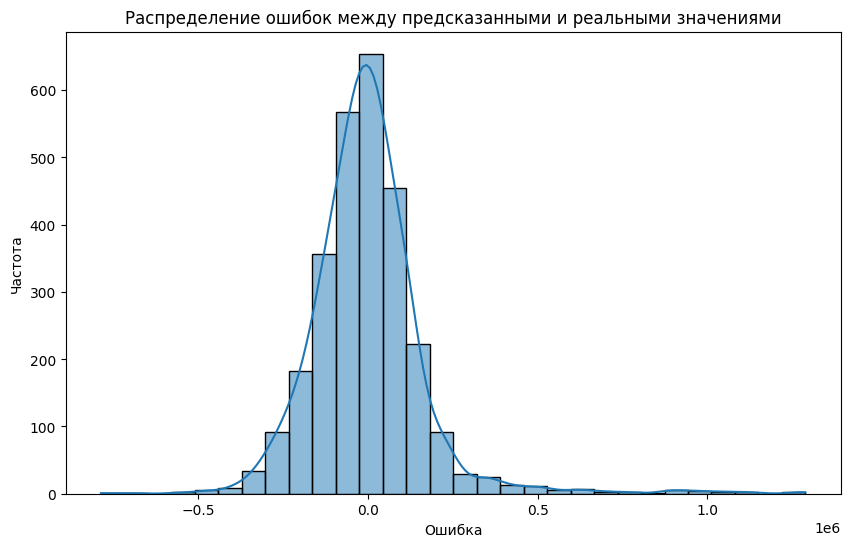

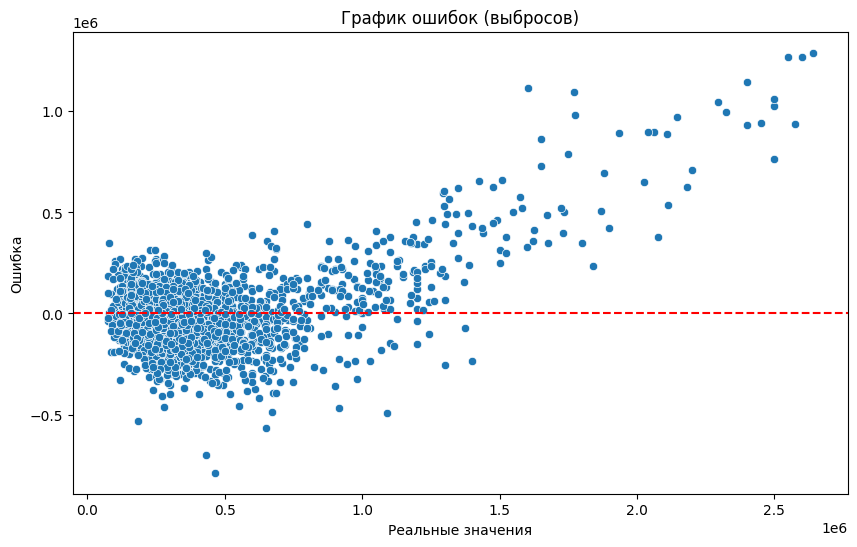

28591014848.43718

In [ ]:
# Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление ошибок предсказания
errors = y_test - y_pred

# Построение графика распределения ошибок
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title('Распределение ошибок между предсказанными и реальными значениями')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.show()

# Построение графика ошибок (выбросов) для оценки точности модели
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=errors)
plt.axhline(0, color='red', linestyle='--')
plt.title('График ошибок (выбросов)')
plt.xlabel('Реальные значения')
plt.ylabel('Ошибка')
plt.show()

# Вычисление среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)
mse

# Шаг 6

**Как изменение одного признака влияет на другой?**

Эта взаимосвязь определяется коэффициентом корреляции между признаками. Если признаки имеют сильную положительную корреляцию (например, близкую к +1), это означает, что увеличение одного признака приводит к увеличению другого. Если корреляция отрицательная (близкая к -1), увеличение одного признака приведет к уменьшению другого. При слабой корреляции (близкой к 0) изменение одного признака почти не влияет на другой.

**Как влияет масштабирование данных на качество модели?**

Масштабирование данных улучшает качество моделей, особенно тех, которые зависят от расстояний между точками данных, таких как линейная регрессия, SVM и KNN. В случае с линейной регрессией масштабирование данных приводит к тому, что все признаки оказывают одинаковое влияние на результат. Без нормализации признаки с большими величинами могут искусственно увеличивать вес в модели, что сделает результаты менее точными.